In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../utils')
import utils


In [17]:
# Import csv to df
df = pd.read_csv('../data/renttherunway_cleaned_data.csv')

In [18]:
# Print cols
print(df.columns)

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date', 'review_length',
       'band_size', 'cup_size'],
      dtype='object')


In [19]:
import matplotlib.pyplot as plt

def generic_hexbin_plot(df, x_column, y_column, gridsize=20, cmap='viridis', xlabel='', ylabel='', title='', xlim=None, ylim=None):
    """
    Generate a hexbin plot for two columns of a DataFrame with optional customizations.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    x_column (str): The name of the column for the x-axis.
    y_column (str): The name of the column for the y-axis.
    gridsize (int, optional): Grid size for the hexbin plot. Default is 20.
    cmap (str, optional): Colormap to use. Default is 'viridis'.
    xlabel (str, optional): Label for the x-axis. Default is an empty string.
    ylabel (str, optional): Label for the y-axis. Default is an empty string.
    title (str, optional): Title for the plot. Default is an empty string.
    xlim (tuple, optional): Tuple containing (min, max) values for the x-axis. Default is None.
    ylim (tuple, optional): Tuple containing (min, max) values for the y-axis. Default is None.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))

    # Create hexbin plot
    plt.hexbin(df[x_column], df[y_column], gridsize=gridsize, cmap=cmap)
    plt.colorbar(label='Count in bin')

    if not xlabel:
        xlabel = x_column
    if not ylabel:
        ylabel = y_column
    if not title:
        title = f'Heatmap of {x_column} vs {y_column}'
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Set limits for the axes if provided
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    plt.show()


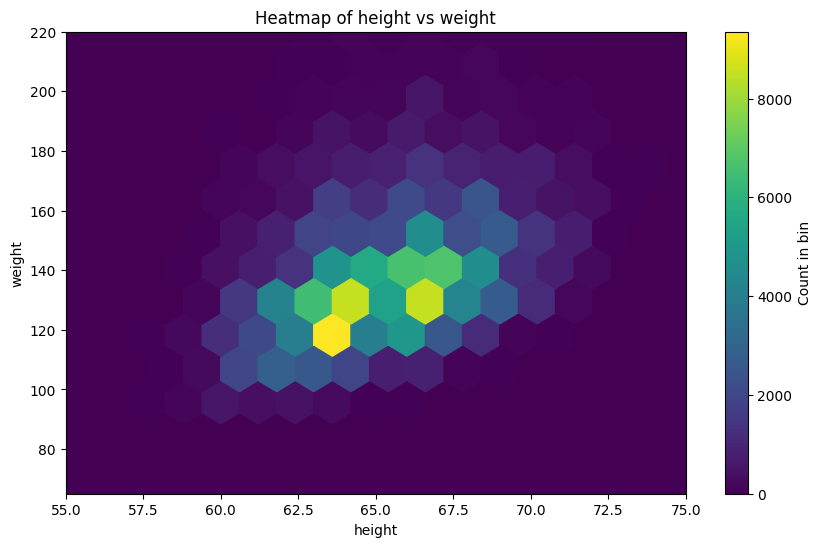

In [20]:
generic_hexbin_plot(df, 'height', 'weight', gridsize=20, xlim=(55, 75), ylim=(65, 220))
# Basically shows what we expect: correlation between height and weight, and outliers move up (with higher weight)

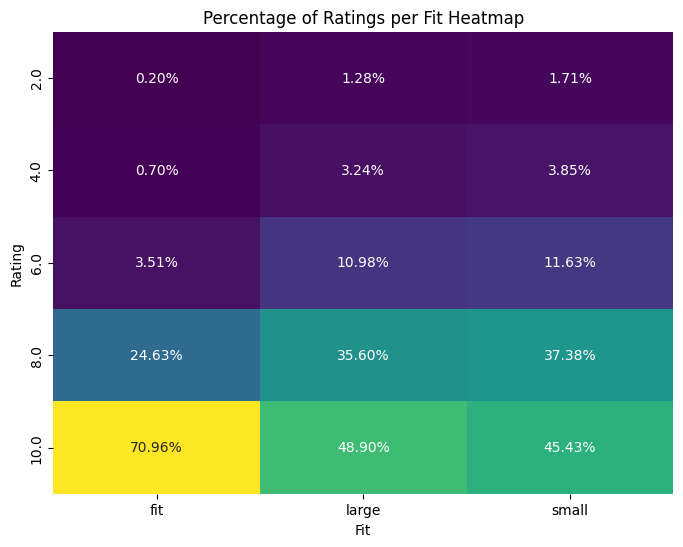

In [21]:
# The percentages represent the percentage of people rating it X for each category

# Create a pivot table to calculate the percentage of each fit rating
pivot_table = pd.crosstab(index=df['rating'], columns=df['fit'], normalize='columns')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap='viridis', linewidths=0, cbar=False)

# Set labels and title
plt.xlabel('Fit')
plt.ylabel('Rating')
plt.title('Percentage of Ratings per Fit Heatmap')

plt.show()

# Interesting that 10 is still most common even if it doesn't fit, but definitely more of lower values too


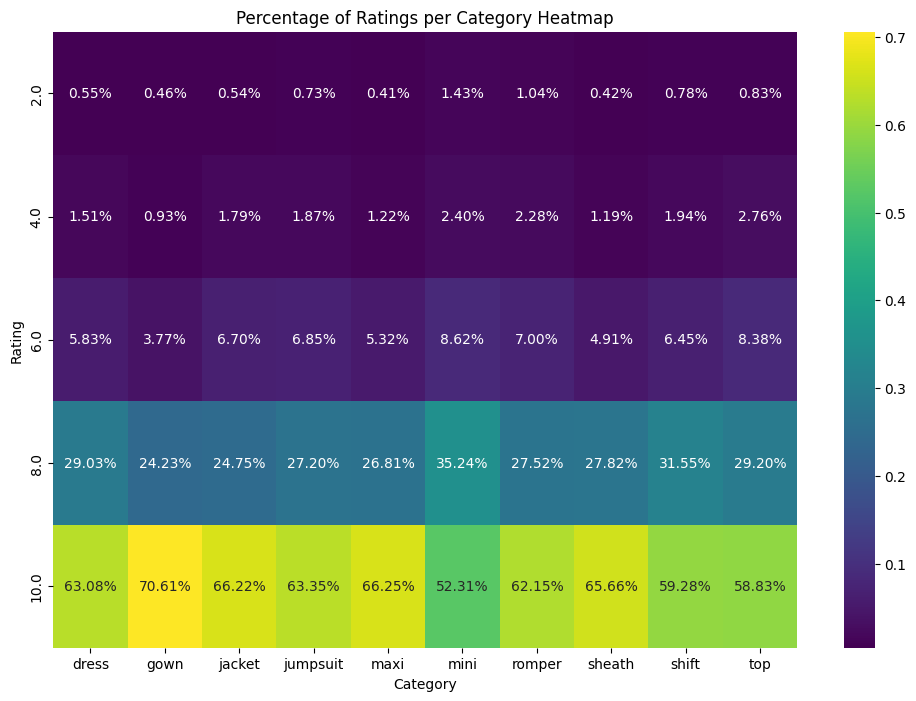

In [22]:
# Find the 10 most common categories
top_categories = df['category'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only rows with the top categories
filtered_df = df[df['category'].isin(top_categories)]

# Create a pivot table to calculate the percentage of each rating in each category
pivot_table = pd.crosstab(index=filtered_df['rating'], columns=filtered_df['category'], normalize='columns')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap='viridis', linewidths=0)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Percentage of Ratings per Category Heatmap')

plt.show()

# Pretty much everyone in categories voting the same way, with a couple exceptions
# These are the 10 most common categories, so no lack of data here


In [23]:
def create_bar_plot(df, x_column, y_column, bin_size, x_limits=None, y_limits=None):
    # Binning the values using the specified bin_size
    df[x_column + '_bins'] = pd.cut(df[x_column], bins=range(x_limits[0], x_limits[1], bin_size), right=False)

    # Calculate the average rating for each bin
    average_ratings = df.groupby(x_column + '_bins')[y_column].mean().reset_index()

    # Calculate the count in each bin
    bin_counts = df[x_column + '_bins'].value_counts().sort_index()

    # Check if bin_counts is empty
    if bin_counts.empty:
        print("No data points in the bins.")
        return

    # Create the bar plot with a uniform color
    ax = sns.barplot(x=x_column + '_bins', y=y_column, data=average_ratings, color=utils.primary_color)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set y-axis limits if provided
    if y_limits:
        plt.ylim(*y_limits)

    # Set the labels and title
    plt.xlabel(x_column.capitalize() + ' Bins')
    plt.ylabel(y_column.capitalize())
    plt.title(f'Average {y_column.capitalize()} for Each {x_column.capitalize()} Bin')

    # Add counts as text above the bars
    for p, count in zip(ax.patches, bin_counts):
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height() + .025), rotation=45, ha='center', va='bottom')


    plt.show()


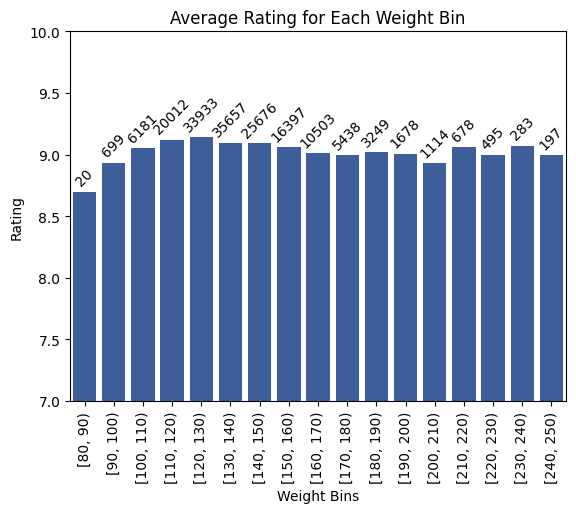

137.39170900948562


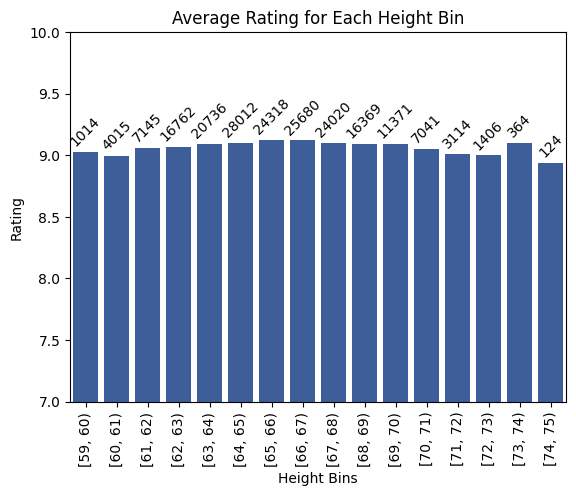

65.31062142004617


In [24]:
create_bar_plot(df, 'weight', 'rating', bin_size=10, x_limits=(80, 260), y_limits=(7, 10))
# Print mean weight
print(df['weight'].mean())

create_bar_plot(df, 'height', 'rating', bin_size=1, x_limits=(59, 76), y_limits=(7, 10))
# Print mean height
print(df['height'].mean())


# Interesting to note that peak ratings are seen at weight less than average weight
# But peak ratings are seen at average height